In [1]:
#ROC CURVES for HC, PD and overall

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
from sklearn.metrics import auc as sklearn_auc
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



## BASE CNN MODEL

In [4]:
#LOAD BASE MODEL CSV
df_base = pd.read_csv('BaseCNN_model.csv')
df_base

,Unnamed: 0,Classification,Entropy,Class,Label
0,0,Correctly Classified,0.038417,PD,1
1,1,Correctly Classified,0.281706,PD,1
2,2,Correctly Classified,0.045415,PD,1
3,3,Correctly Classified,0.212621,PD,1
4,4,Correctly Classified,0.134649,PD,1
...,...,...,...,...,...
181,181,Correctly Classified,0.060886,PD,1
182,182,Correctly Classified,0.468361,HC,1
183,183,Correctly Classified,0.132934,PD,1
184,184,Correctly Classified,0.028624,PD,1


In [5]:
def analyze_entropy_threshold(df):
    # Step 1: Find Misclassified Point with Lowest Entropy
    misclassified_points = df[df['Classification'] == 'Misclassified']
    misclassified_points_sorted = misclassified_points.sort_values(by='Entropy', ascending=True)
    lowest_entropy_misclassified = misclassified_points_sorted.iloc[0]

    # Step 2: Use Lowest Entropy as Threshold
    entropy_threshold = lowest_entropy_misclassified['Entropy']

    # Step 3: Count Points Above Threshold
    points_above_threshold = df[df['Entropy'] > entropy_threshold]

    # Count Correctly Classified and Misclassified points above the threshold
    correctly_classified_HC_above_threshold = len(points_above_threshold[
        (points_above_threshold['Classification'] == 'Correctly Classified') &
        (points_above_threshold['Class'] == 'HC')
    ])
    correctly_classified_PD_above_threshold = len(points_above_threshold[
        (points_above_threshold['Classification'] == 'Correctly Classified') &
        (points_above_threshold['Class'] == 'PD')
    ])
    misclassified_HC_above_threshold = len(points_above_threshold[
        (points_above_threshold['Classification'] == 'Misclassified') &
        (points_above_threshold['Class'] == 'HC')
    ])
    misclassified_PD_above_threshold = len(points_above_threshold[
        (points_above_threshold['Classification'] == 'Misclassified') &
        (points_above_threshold['Class'] == 'PD')
    ])
    correctly_classified_above_threshold = correctly_classified_HC_above_threshold + correctly_classified_PD_above_threshold
    misclassified_above_threshold = misclassified_HC_above_threshold + misclassified_PD_above_threshold
    total_above_threshold = correctly_classified_above_threshold + misclassified_above_threshold

    # Display results
    print(f"Lowest entropy misclassified point: {lowest_entropy_misclassified}")
    print(f"Entropy threshold: {entropy_threshold}")
    print(f"Number of Correctly Classified HC points above threshold: {correctly_classified_HC_above_threshold}")
    print(f"Number of Correctly Classified PD points above threshold: {correctly_classified_PD_above_threshold}")
    print(f"Number of Misclassified HC points above threshold: {misclassified_HC_above_threshold}")
    print(f"Number of Misclassified PD points above threshold: {misclassified_PD_above_threshold}")
    print(f"Number of Correctly Classified points above threshold: {correctly_classified_above_threshold}")
    print(f"Number of Misclassified points above threshold: {misclassified_above_threshold}")
    print(f"Total Number of samples above threshold: {total_above_threshold}")


In [6]:
def analyze_entropy_threshold_PD(df):
    # Step 1: Find Misclassified Point with Lowest Entropy
    misclassified_points = df[df['Classification'] == 'Misclassified']
    misclassified_points_sorted = misclassified_points.sort_values(by='Entropy', ascending=True)
    lowest_entropy_misclassified = misclassified_points_sorted[misclassified_points_sorted['Class'] == 'PD'].iloc[0]


    # Step 2: Use Lowest Entropy as Threshold
    entropy_threshold = lowest_entropy_misclassified['Entropy']

    # Step 3: Count Points Above Threshold
    points_above_threshold = df[df['Entropy'] > entropy_threshold]

    # Count Correctly Classified and Misclassified points above the threshold
    correctly_classified_HC_above_threshold = len(points_above_threshold[
        (points_above_threshold['Classification'] == 'Correctly Classified') &
        (points_above_threshold['Class'] == 'HC')
    ])
    correctly_classified_PD_above_threshold = len(points_above_threshold[
        (points_above_threshold['Classification'] == 'Correctly Classified') &
        (points_above_threshold['Class'] == 'PD')
    ])
    misclassified_HC_above_threshold = len(points_above_threshold[
        (points_above_threshold['Classification'] == 'Misclassified') &
        (points_above_threshold['Class'] == 'HC')
    ])
    misclassified_PD_above_threshold = len(points_above_threshold[
        (points_above_threshold['Classification'] == 'Misclassified') &
        (points_above_threshold['Class'] == 'PD')
    ])
    correctly_classified_above_threshold = correctly_classified_HC_above_threshold + correctly_classified_PD_above_threshold
    misclassified_above_threshold = misclassified_HC_above_threshold + misclassified_PD_above_threshold
    total_above_threshold = correctly_classified_above_threshold + misclassified_above_threshold

    # Display results
    print(f"Lowest entropy misclassified point: {lowest_entropy_misclassified}")
    print(f"Entropy threshold: {entropy_threshold}")
    print(f"Number of Correctly Classified HC points above threshold: {correctly_classified_HC_above_threshold}")
    print(f"Number of Correctly Classified PD points above threshold: {correctly_classified_PD_above_threshold}")
    print(f"Number of Misclassified HC points above threshold: {misclassified_HC_above_threshold}")
    print(f"Number of Misclassified PD points above threshold: {misclassified_PD_above_threshold}")
    print(f"Number of Correctly Classified points above threshold: {correctly_classified_above_threshold}")
    print(f"Number of Misclassified points above threshold: {misclassified_above_threshold}")
    print(f"Total Number of samples above threshold: {total_above_threshold}")


In [7]:
# Call the function with your DataFrame
analyze_entropy_threshold(df_base)

Lowest entropy misclassified point: Unnamed: 0                   13
Classification    Misclassified
Entropy                0.694941
Class                        PD
Label                         0
Name: 13, dtype: object
Entropy threshold: 0.6949413
Number of Correctly Classified HC points above threshold: 10
Number of Correctly Classified PD points above threshold: 11
Number of Misclassified HC points above threshold: 4
Number of Misclassified PD points above threshold: 5
Number of Correctly Classified points above threshold: 21
Number of Misclassified points above threshold: 9
Total Number of samples above threshold: 30


In [8]:
analyze_entropy_threshold_PD(df_base)

Lowest entropy misclassified point: Unnamed: 0                   13
Classification    Misclassified
Entropy                0.694941
Class                        PD
Label                         0
Name: 13, dtype: object
Entropy threshold: 0.6949413
Number of Correctly Classified HC points above threshold: 10
Number of Correctly Classified PD points above threshold: 11
Number of Misclassified HC points above threshold: 4
Number of Misclassified PD points above threshold: 5
Number of Correctly Classified points above threshold: 21
Number of Misclassified points above threshold: 9
Total Number of samples above threshold: 30


In [9]:
classification_array = df_base['Label'].values
classification_array_HC = df_base[df_base['Class'] == 'HC']['Label'].values
classification_array_PD = df_base[df_base['Class'] == 'PD']['Label'].values
entropy_array  = df_base['Entropy'].values
entropy_array_HC = df_base[df_base['Class'] == 'HC']['Entropy'].values
entropy_array_PD = df_base[df_base['Class'] == 'PD']['Entropy'].values

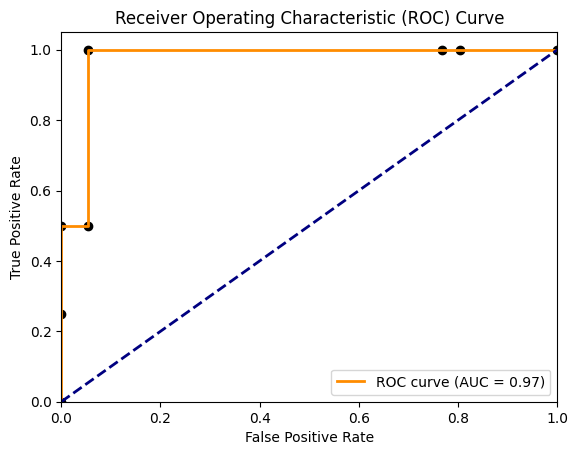

In [10]:

# Calculate true positive rate (sensitivity) and false positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(classification_array_HC, entropy_array_HC)

# Calculate AUC
roc_auc = sklearn_auc(tpr, fpr)

# Plotting ROC curve
plt.figure()
plt.plot(tpr, fpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# Adding threshold points
for i, threshold in enumerate(thresholds):
    plt.scatter(tpr[i], fpr[i], c='black', marker='o')
plt.show()

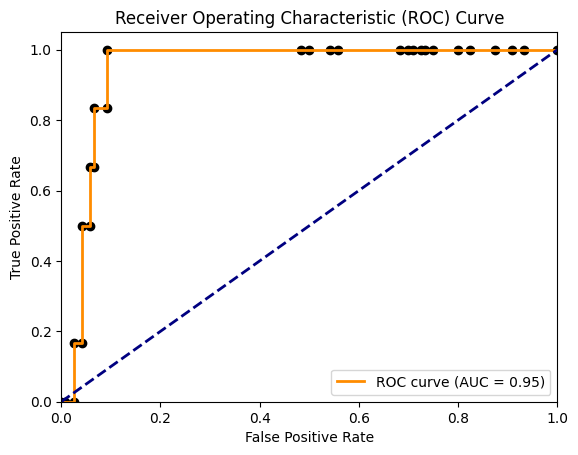

In [11]:
# Calculate true positive rate (sensitivity) and false positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(classification_array_PD, entropy_array_PD)

# Calculate AUC
roc_auc = sklearn_auc(tpr, fpr)

# Plotting ROC curve
plt.figure()
plt.plot(tpr, fpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# Adding threshold points
for i, threshold in enumerate(thresholds):
    plt.scatter(tpr[i], fpr[i], c='black', marker='o')
plt.show()

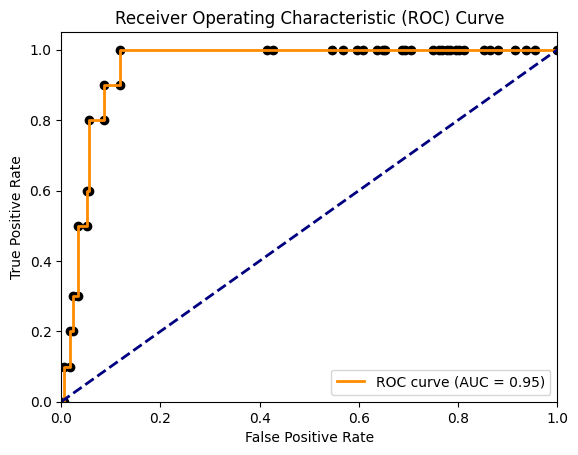

In [12]:
# Calculate true positive rate (sensitivity) and false positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(classification_array, entropy_array)

# Calculate AUC
roc_auc = sklearn_auc(tpr, fpr)

# Plotting ROC curve
plt.figure()
plt.plot(tpr, fpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# Adding threshold points
for i, threshold in enumerate(thresholds):
    plt.scatter(tpr[i], fpr[i], c='black', marker='o')
plt.show()

## TEMP SCALING:

In [13]:
#LOAD Temp Scale CSV
df_temp = pd.read_csv('TempScale_model.csv')
df_temp

,Unnamed: 0,Classification,Entropy,Class,Label
0,0,Correctly Classified,0.006859,PD,1
1,1,Correctly Classified,0.110972,PD,1
2,2,Correctly Classified,0.022790,PD,1
3,3,Correctly Classified,0.031216,PD,1
4,4,Correctly Classified,0.061186,PD,1
...,...,...,...,...,...
181,181,Correctly Classified,0.006683,PD,1
182,182,Correctly Classified,0.112448,HC,1
183,183,Correctly Classified,0.002974,PD,1
184,184,Correctly Classified,0.051836,PD,1


In [14]:
# Call the function with your DataFrame
analyze_entropy_threshold(df_temp)

Lowest entropy misclassified point: Unnamed: 0                   83
Classification    Misclassified
Entropy                0.477615
Class                        HC
Label                         0
Name: 83, dtype: object
Entropy threshold: 0.47761476
Number of Correctly Classified HC points above threshold: 7
Number of Correctly Classified PD points above threshold: 6
Number of Misclassified HC points above threshold: 4
Number of Misclassified PD points above threshold: 6
Number of Correctly Classified points above threshold: 13
Number of Misclassified points above threshold: 10
Total Number of samples above threshold: 23


In [15]:
analyze_entropy_threshold_PD(df_temp)

Lowest entropy misclassified point: Unnamed: 0                  143
Classification    Misclassified
Entropy                0.595813
Class                        PD
Label                         0
Name: 143, dtype: object
Entropy threshold: 0.5958129
Number of Correctly Classified HC points above threshold: 7
Number of Correctly Classified PD points above threshold: 5
Number of Misclassified HC points above threshold: 3
Number of Misclassified PD points above threshold: 5
Number of Correctly Classified points above threshold: 12
Number of Misclassified points above threshold: 8
Total Number of samples above threshold: 20


In [16]:
classification_array = df_temp['Label'].values
classification_array_HC = df_temp[df_temp['Class'] == 'HC']['Label'].values
classification_array_PD = df_temp[df_temp['Class'] == 'PD']['Label'].values
entropy_array  = df_temp['Entropy'].values
entropy_array_HC = df_temp[df_temp['Class'] == 'HC']['Entropy'].values
entropy_array_PD = df_temp[df_temp['Class'] == 'PD']['Entropy'].values

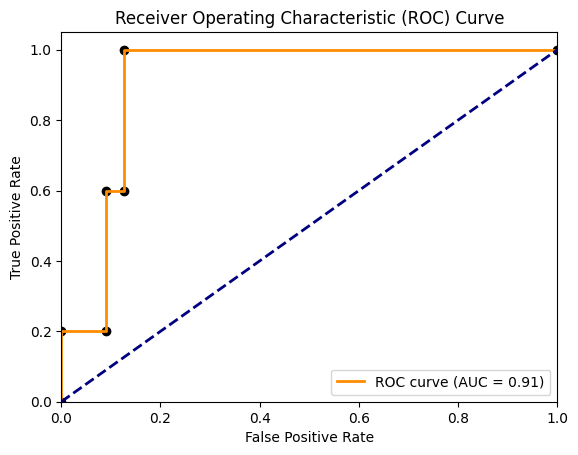

In [17]:

# Calculate true positive rate (sensitivity) and false positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(classification_array_HC, entropy_array_HC)

# Calculate AUC
roc_auc = sklearn_auc(tpr, fpr)

# Plotting ROC curve
plt.figure()
plt.plot(tpr, fpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# Adding threshold points
for i, threshold in enumerate(thresholds):
    plt.scatter(tpr[i], fpr[i], c='black', marker='o')
plt.show()

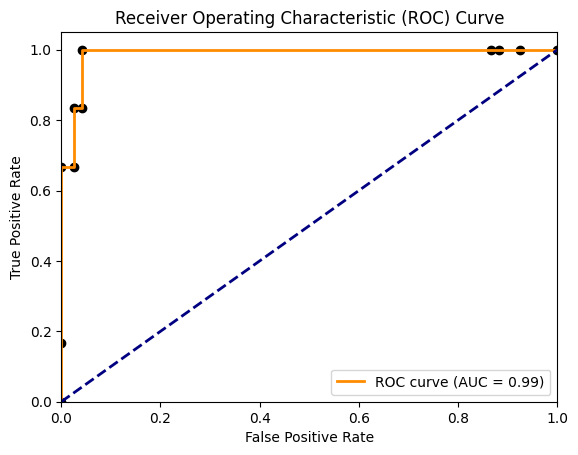

In [18]:
# Calculate true positive rate (sensitivity) and false positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(classification_array_PD, entropy_array_PD)

# Calculate AUC
roc_auc = sklearn_auc(tpr, fpr)

# Plotting ROC curve
plt.figure()
plt.plot(tpr, fpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# Adding threshold points
for i, threshold in enumerate(thresholds):
    plt.scatter(tpr[i], fpr[i], c='black', marker='o')
plt.show()

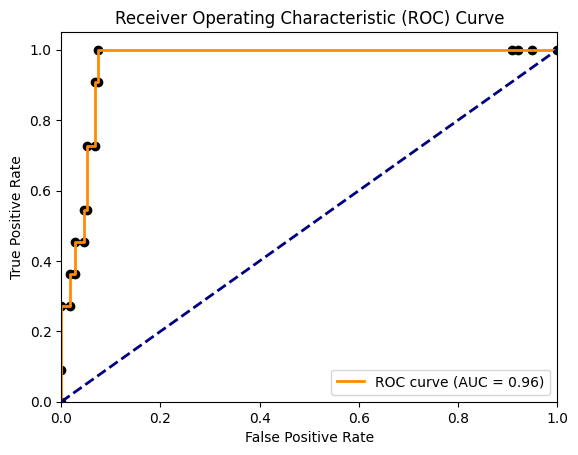

In [19]:
# Calculate true positive rate (sensitivity) and false positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(classification_array, entropy_array)

# Calculate AUC
roc_auc = sklearn_auc(tpr, fpr)

# Plotting ROC curve
plt.figure()
plt.plot(tpr, fpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# Adding threshold points
for i, threshold in enumerate(thresholds):
    plt.scatter(tpr[i], fpr[i], c='black', marker='o')
plt.show()

## SNGP MODEL

In [20]:
#LOAD BASE MODEL CSV
df_sngp = pd.read_csv('SNGP_model.csv')
df_sngp

,Unnamed: 0,Classification,Entropy,Class,Label
0,0,Correctly Classified,0.171450,PD,1
1,1,Correctly Classified,0.348770,PD,1
2,2,Correctly Classified,0.184232,PD,1
3,3,Correctly Classified,0.203022,PD,1
4,4,Correctly Classified,0.167761,PD,1
...,...,...,...,...,...
181,181,Correctly Classified,0.137802,PD,1
182,182,Correctly Classified,0.560908,HC,1
183,183,Correctly Classified,0.196244,PD,1
184,184,Correctly Classified,0.183022,PD,1


In [21]:
# Call the function with your DataFrame
analyze_entropy_threshold(df_sngp)

Lowest entropy misclassified point: Unnamed: 0                  145
Classification    Misclassified
Entropy                 0.88128
Class                        HC
Label                         0
Name: 145, dtype: object
Entropy threshold: 0.8812800573528992
Number of Correctly Classified HC points above threshold: 8
Number of Correctly Classified PD points above threshold: 6
Number of Misclassified HC points above threshold: 3
Number of Misclassified PD points above threshold: 4
Number of Correctly Classified points above threshold: 14
Number of Misclassified points above threshold: 7
Total Number of samples above threshold: 21


In [22]:
analyze_entropy_threshold_PD(df_sngp)

Lowest entropy misclassified point: Unnamed: 0                   27
Classification    Misclassified
Entropy                0.957031
Class                        PD
Label                         0
Name: 27, dtype: object
Entropy threshold: 0.9570311342706874
Number of Correctly Classified HC points above threshold: 5
Number of Correctly Classified PD points above threshold: 3
Number of Misclassified HC points above threshold: 3
Number of Misclassified PD points above threshold: 3
Number of Correctly Classified points above threshold: 8
Number of Misclassified points above threshold: 6
Total Number of samples above threshold: 14


In [23]:
classification_array = df_sngp['Label'].values
classification_array_HC = df_sngp[df_sngp['Class'] == 'HC']['Label'].values
classification_array_PD = df_sngp[df_sngp['Class'] == 'PD']['Label'].values
entropy_array  = df_sngp['Entropy'].values
entropy_array_HC = df_sngp[df_sngp['Class'] == 'HC']['Entropy'].values
entropy_array_PD = df_sngp[df_sngp['Class'] == 'PD']['Entropy'].values

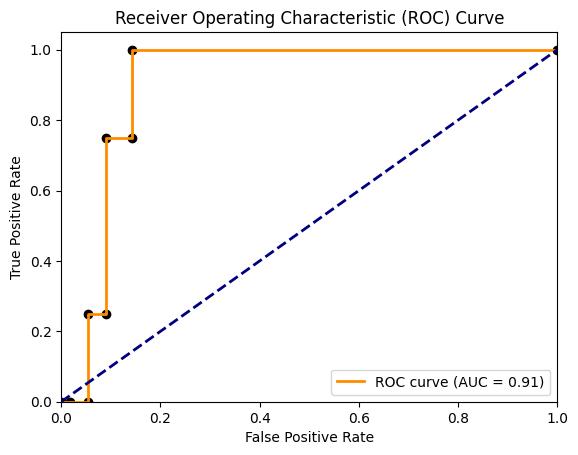

In [24]:

# Calculate true positive rate (sensitivity) and false positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(classification_array_HC, entropy_array_HC)

# Calculate AUC
roc_auc = sklearn_auc(tpr, fpr)

# Plotting ROC curve
plt.figure()
plt.plot(tpr, fpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# Adding threshold points
for i, threshold in enumerate(thresholds):
    plt.scatter(tpr[i], fpr[i], c='black', marker='o')
plt.show()

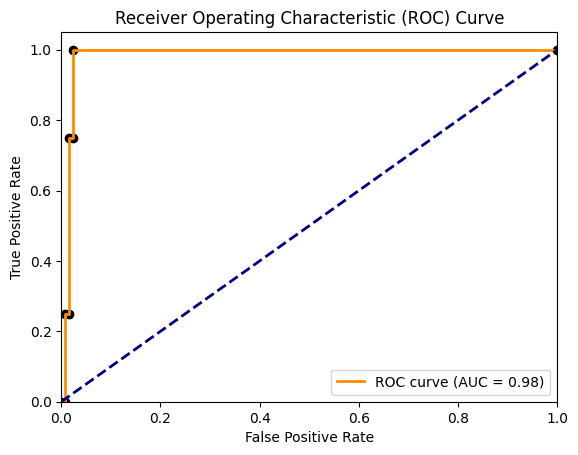

In [25]:
# Calculate true positive rate (sensitivity) and false positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(classification_array_PD, entropy_array_PD)

# Calculate AUC
roc_auc = sklearn_auc(tpr, fpr)

# Plotting ROC curve
plt.figure()
plt.plot(tpr, fpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# Adding threshold points
for i, threshold in enumerate(thresholds):
    plt.scatter(tpr[i], fpr[i], c='black', marker='o')
plt.show()

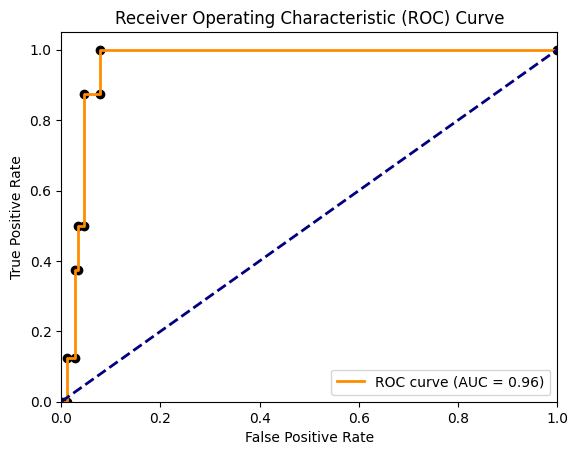

In [26]:
# Calculate true positive rate (sensitivity) and false positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(classification_array, entropy_array)

# Calculate AUC
roc_auc = sklearn_auc(tpr, fpr)

# Plotting ROC curve
plt.figure()
plt.plot(tpr, fpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# Adding threshold points
for i, threshold in enumerate(thresholds):
    plt.scatter(tpr[i], fpr[i], c='black', marker='o')
plt.show()

## MCD MODEL

In [27]:
#LOAD mcd MODEL CSV
df_mcd = pd.read_csv('MCD_model.csv')
df_mcd

,Unnamed: 0,Classification,Entropy,Class,Label
0,0,Correctly Classified,0.037622,PD,1
1,1,Correctly Classified,0.412663,PD,1
2,2,Correctly Classified,0.106274,PD,1
3,3,Correctly Classified,0.080793,PD,1
4,4,Correctly Classified,0.100082,PD,1
...,...,...,...,...,...
181,181,Correctly Classified,0.067222,PD,1
182,182,Correctly Classified,0.398646,HC,1
183,183,Correctly Classified,0.037622,PD,1
184,184,Correctly Classified,0.067222,PD,1


In [28]:
analyze_entropy_threshold(df_mcd)

Lowest entropy misclassified point: Unnamed: 0                   49
Classification    Misclassified
Entropy                0.562898
Class                        HC
Label                         0
Name: 49, dtype: object
Entropy threshold: 0.5628978
Number of Correctly Classified HC points above threshold: 11
Number of Correctly Classified PD points above threshold: 10
Number of Misclassified HC points above threshold: 1
Number of Misclassified PD points above threshold: 7
Number of Correctly Classified points above threshold: 21
Number of Misclassified points above threshold: 8
Total Number of samples above threshold: 29


In [29]:
analyze_entropy_threshold_PD(df_mcd)

Lowest entropy misclassified point: Unnamed: 0                  143
Classification    Misclassified
Entropy                0.711815
Class                        PD
Label                         0
Name: 143, dtype: object
Entropy threshold: 0.71181464
Number of Correctly Classified HC points above threshold: 8
Number of Correctly Classified PD points above threshold: 8
Number of Misclassified HC points above threshold: 1
Number of Misclassified PD points above threshold: 6
Number of Correctly Classified points above threshold: 16
Number of Misclassified points above threshold: 7
Total Number of samples above threshold: 23


## DEEP ENSEMBLE

In [30]:
#LOAD mcd MODEL CSV
df_deep = pd.read_csv('DE_model.csv')
df_deep

,Unnamed: 0,Classification,Entropy,Class,Label
0,0,Correctly Classified,0.091690,PD,1
1,1,Correctly Classified,0.305332,PD,1
2,2,Correctly Classified,0.072453,PD,1
3,3,Correctly Classified,0.144315,PD,1
4,4,Correctly Classified,0.174745,PD,1
...,...,...,...,...,...
181,181,Correctly Classified,0.064567,PD,1
182,182,Correctly Classified,0.660979,HC,1
183,183,Correctly Classified,0.151367,PD,1
184,184,Correctly Classified,0.051805,PD,1


In [31]:
analyze_entropy_threshold(df_deep)

Lowest entropy misclassified point: Unnamed: 0                   13
Classification    Misclassified
Entropy                0.862733
Class                        PD
Label                         0
Name: 13, dtype: object
Entropy threshold: 0.86273307
Number of Correctly Classified HC points above threshold: 9
Number of Correctly Classified PD points above threshold: 7
Number of Misclassified HC points above threshold: 4
Number of Misclassified PD points above threshold: 2
Number of Correctly Classified points above threshold: 16
Number of Misclassified points above threshold: 6
Total Number of samples above threshold: 22


In [32]:
analyze_entropy_threshold_PD(df_deep)

Lowest entropy misclassified point: Unnamed: 0                   13
Classification    Misclassified
Entropy                0.862733
Class                        PD
Label                         0
Name: 13, dtype: object
Entropy threshold: 0.86273307
Number of Correctly Classified HC points above threshold: 9
Number of Correctly Classified PD points above threshold: 7
Number of Misclassified HC points above threshold: 4
Number of Misclassified PD points above threshold: 2
Number of Correctly Classified points above threshold: 16
Number of Misclassified points above threshold: 6
Total Number of samples above threshold: 22


## 3rd DE MODEL

In [33]:
#LOAD mcd MODEL CSV
df_3RD = pd.read_csv('3rdDE_model.csv')
df_3RD

,Unnamed: 0,Classification,Entropy,Class,Label
0,0,Correctly Classified,1.688463e-04,PD,1
1,1,Correctly Classified,3.995467e-01,PD,1
2,2,Correctly Classified,6.726860e-03,PD,1
3,3,Correctly Classified,9.628715e-03,PD,1
4,4,Correctly Classified,2.805973e-03,PD,1
...,...,...,...,...,...
181,181,Correctly Classified,1.748516e-04,PD,1
182,182,Correctly Classified,5.372421e-02,HC,1
183,183,Correctly Classified,1.094745e-04,PD,1
184,184,Correctly Classified,9.121275e-03,PD,1


In [34]:
analyze_entropy_threshold(df_3RD)

Lowest entropy misclassified point: Unnamed: 0                   13
Classification    Misclassified
Entropy                0.557045
Class                        PD
Label                         0
Name: 13, dtype: object
Entropy threshold: 0.55704534
Number of Correctly Classified HC points above threshold: 3
Number of Correctly Classified PD points above threshold: 7
Number of Misclassified HC points above threshold: 0
Number of Misclassified PD points above threshold: 6
Number of Correctly Classified points above threshold: 10
Number of Misclassified points above threshold: 6
Total Number of samples above threshold: 16


In [35]:
analyze_entropy_threshold_PD(df_3RD)

Lowest entropy misclassified point: Unnamed: 0                   13
Classification    Misclassified
Entropy                0.557045
Class                        PD
Label                         0
Name: 13, dtype: object
Entropy threshold: 0.55704534
Number of Correctly Classified HC points above threshold: 3
Number of Correctly Classified PD points above threshold: 7
Number of Misclassified HC points above threshold: 0
Number of Misclassified PD points above threshold: 6
Number of Correctly Classified points above threshold: 10
Number of Misclassified points above threshold: 6
Total Number of samples above threshold: 16


## BASE CNN ENTROPY PLOT

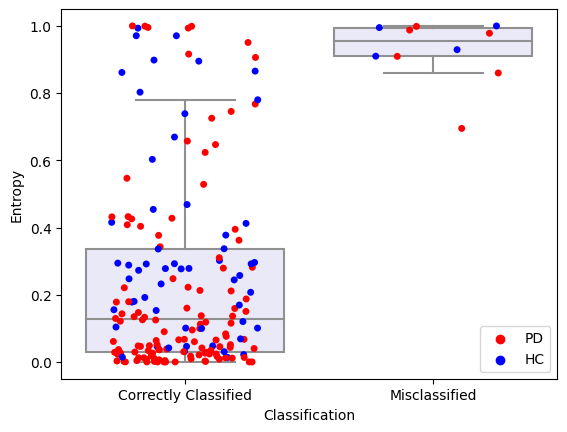

In [66]:
box_color_palette = ['#E6E6FA','#E6E6FA']# colors=[lavender, lavender]
strip_color_palette = {'HC': '#0000FF', 'PD': '#FF0000'}# colors=[bright red, bright blue]
jitter_amount = 0.3 
fig, ax = plt.subplots()
ax = sns.boxplot(x='Classification', y='Entropy', data=df_base, palette=box_color_palette, showfliers=False)
np.random.seed(42)

sns.stripplot(x='Classification', y='Entropy', data=df_base, hue = 'Class', ax=ax, palette=strip_color_palette, jitter = jitter_amount)
plt.legend()

plt.show()

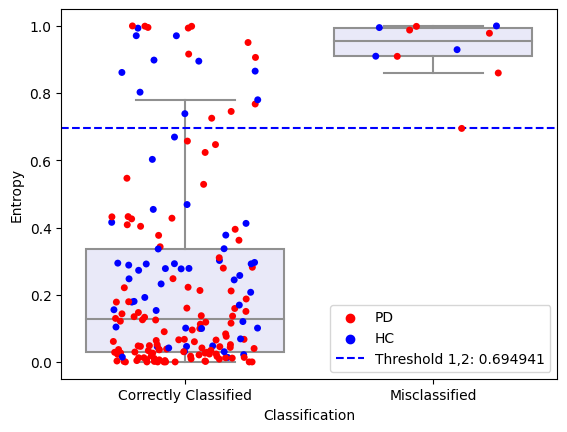

In [102]:
box_color_palette = ['#E6E6FA','#E6E6FA']# colors=[lavender, lavender]
strip_color_palette = {'HC': '#0000FF', 'PD': '#FF0000'}# colors=[bright red, bright blue]
jitter_amount = 0.3 
fig, ax = plt.subplots()
ax = sns.boxplot(x='Classification', y='Entropy', data=df_base, palette=box_color_palette, showfliers=False)
np.random.seed(42)
sns.stripplot(x='Classification', y='Entropy', data=df_base, hue = 'Class', ax=ax, palette=strip_color_palette, jitter = jitter_amount)

# Add a horizontal red line at a specific entropy value
PD_entropy_threshold = 0.694941  # Change this to your desired entropy value
base_entropy_threshold = 0.694941 
ax.axhline(y=PD_entropy_threshold, color='blue', linestyle='--', label=f'Threshold 1,2: {PD_entropy_threshold}')
#ax.axhline(y=PD_entropy_threshold, color='crimson', linestyle='--', label=f'Threshold 2: {PD_entropy_threshold}')
#ax.axhline(y=base_entropy_threshold, color='green', linestyle='--', label=f'Base Entropy Threshold: {base_entropy_threshold}')
#ax.text(0.5, PD_entropy_threshold, f'{PD_entropy_threshold:.6f}', color='red', ha='left', va='bottom')
plt.legend()

plt.show()


## TEMP SCALING

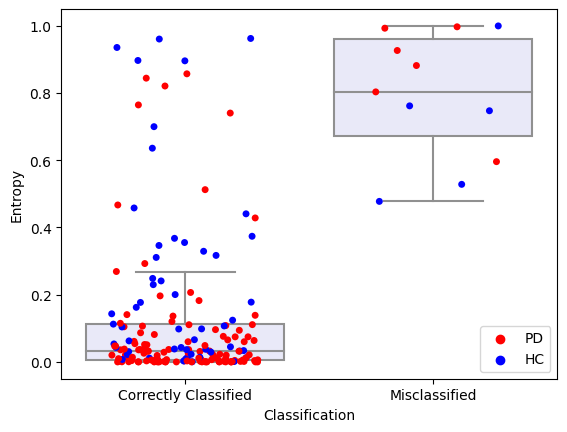

In [68]:
box_color_palette = ['#E6E6FA','#E6E6FA']# colors=[lavender, lavender]
strip_color_palette = {'HC': '#0000FF', 'PD': '#FF0000'}# colors=[bright red, bright blue]
jitter_amount = 0.3
fig, ax = plt.subplots()
ax = sns.boxplot(x='Classification', y='Entropy', data=df_temp, palette=box_color_palette, showfliers=False)
np.random.seed(42)
sns.stripplot(x='Classification', y='Entropy', data=df_temp, hue = 'Class', ax=ax, palette=strip_color_palette, jitter = jitter_amount)

plt.legend()

plt.show()

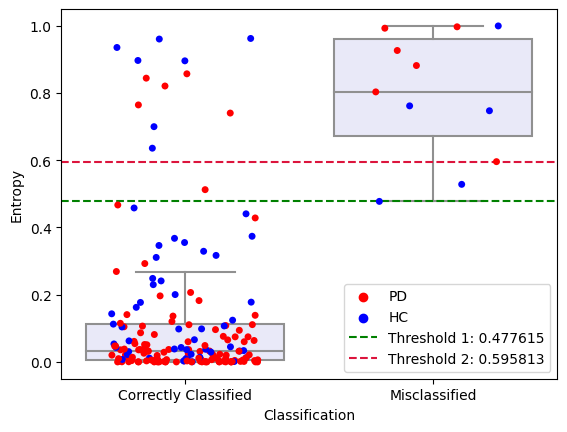

In [80]:
box_color_palette = ['#E6E6FA','#E6E6FA']# colors=[lavender, lavender]
strip_color_palette = {'HC': '#0000FF', 'PD': '#FF0000'}# colors=[bright red, bright blue]
jitter_amount = 0.3
fig, ax = plt.subplots()
ax = sns.boxplot(x='Classification', y='Entropy', data=df_temp, palette=box_color_palette, showfliers=False)
np.random.seed(42)
sns.stripplot(x='Classification', y='Entropy', data=df_temp, hue = 'Class', ax=ax, palette=strip_color_palette, jitter = jitter_amount)

# Add a horizontal red line at a specific entropy value
PD_entropy_threshold = 0.595813 # Change this to your desired entropy value
base_entropy_threshold = 0.477615
ax.axhline(y=base_entropy_threshold, color='green', linestyle='--', label=f'Threshold 1: {base_entropy_threshold}')
ax.axhline(y=PD_entropy_threshold, color='crimson', linestyle='--', label=f'Threshold 2: {PD_entropy_threshold}')

#ax.text(0.5, PD_entropy_threshold, f'{PD_entropy_threshold:.6f}', color='red', ha='left', va='bottom')
#ax.text(0.5, base_entropy_threshold, f'{base_entropy_threshold:.6f}', color='green', ha='left', va='bottom')
plt.legend()

plt.show()

## SNGP

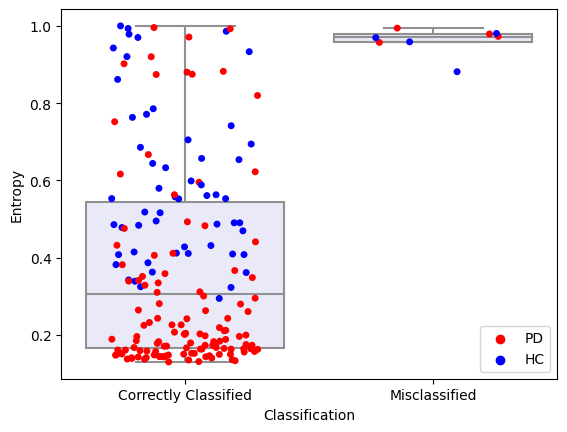

In [70]:
box_color_palette = ['#E6E6FA','#E6E6FA']# colors=[lavender, lavender]
strip_color_palette = {'HC': '#0000FF', 'PD': '#FF0000'}# colors=[bright red, bright blue]
jitter_amount = 0.3
fig, ax = plt.subplots()
ax = sns.boxplot(x='Classification', y='Entropy', data=df_sngp, palette=box_color_palette, showfliers=False)
np.random.seed(42)
sns.stripplot(x='Classification', y='Entropy', data=df_sngp, hue = 'Class', ax=ax, palette=strip_color_palette, jitter = jitter_amount)

plt.legend()

plt.show()

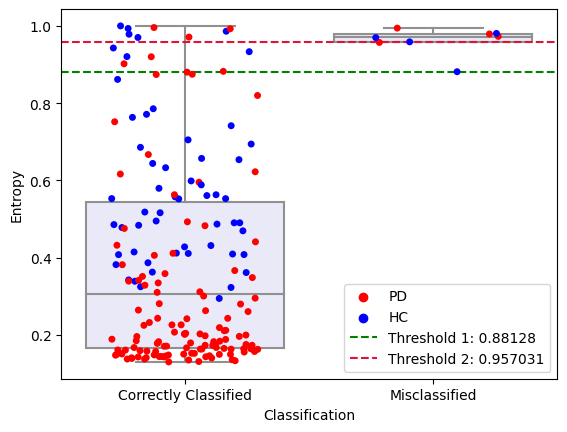

In [85]:
box_color_palette = ['#E6E6FA','#E6E6FA']# colors=[lavender, lavender]
strip_color_palette = {'HC': '#0000FF', 'PD': '#FF0000'}# colors=[bright red, bright blue]
jitter_amount = 0.3
fig, ax = plt.subplots()
ax = sns.boxplot(x='Classification', y='Entropy', data=df_sngp, palette=box_color_palette, showfliers=False)
np.random.seed(42)
sns.stripplot(x='Classification', y='Entropy', data=df_sngp, hue = 'Class', ax=ax, palette=strip_color_palette, jitter = jitter_amount)

# Add a horizontal red line at a specific entropy value
PD_entropy_threshold = 0.957031  # Change this to your desired entropy value
base_entropy_threshold = 0.88128
ax.axhline(y=base_entropy_threshold, color='green', linestyle='--', label=f'Threshold 1: {base_entropy_threshold}')
ax.axhline(y=PD_entropy_threshold, color='crimson', linestyle='--', label=f'Threshold 2: {PD_entropy_threshold}')

#ax.text(0.5, PD_entropy_threshold, f'{PD_entropy_threshold:.6f}', color='red', ha='left', va='bottom')
#ax.text(0.5, base_entropy_threshold, f'{base_entropy_threshold:.6f}', color='green', ha='left', va='bottom')
plt.legend()

plt.show()

## MC DROPOUT

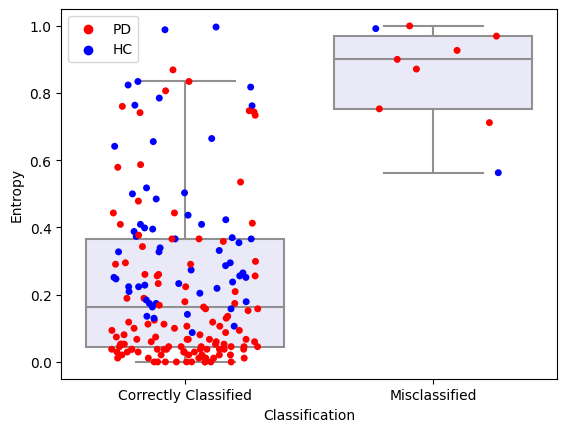

In [72]:
box_color_palette = ['#E6E6FA','#E6E6FA']# colors=[lavender, lavender]
strip_color_palette = {'HC': '#0000FF', 'PD': '#FF0000'}# colors=[bright red, bright blue]
jitter_amount = 0.3
fig, ax = plt.subplots()
ax = sns.boxplot(x='Classification', y='Entropy', data=df_mcd, palette=box_color_palette, showfliers=False)
np.random.seed(42)
sns.stripplot(x='Classification', y='Entropy', data=df_mcd, hue = 'Class', ax=ax, palette=strip_color_palette, jitter = jitter_amount)
plt.legend()

plt.show()

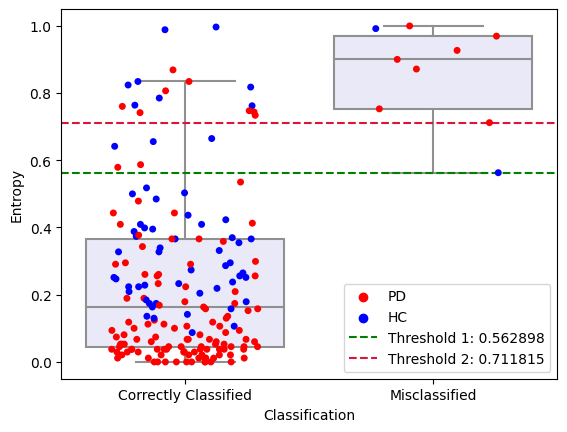

In [81]:
box_color_palette = ['#E6E6FA','#E6E6FA']# colors=[lavender, lavender]
strip_color_palette = {'HC': '#0000FF', 'PD': '#FF0000'}# colors=[bright red, bright blue]
jitter_amount = 0.3
fig, ax = plt.subplots()
ax = sns.boxplot(x='Classification', y='Entropy', data=df_mcd, palette=box_color_palette, showfliers=False)
np.random.seed(42)
sns.stripplot(x='Classification', y='Entropy', data=df_mcd, hue = 'Class', ax=ax, palette=strip_color_palette, jitter = jitter_amount)

# Add a horizontal red line at a specific entropy value
PD_entropy_threshold = 0.711815  # Change this to your desired entropy value
base_entropy_threshold = 0.562898
ax.axhline(y=base_entropy_threshold, color='green', linestyle='--', label=f'Threshold 1: {base_entropy_threshold}')
ax.axhline(y=PD_entropy_threshold, color='crimson', linestyle='--', label=f'Threshold 2: {PD_entropy_threshold}')

#ax.text(0.5, PD_entropy_threshold, f'{PD_entropy_threshold:.6f}', color='red', ha='left', va='bottom')
#ax.text(0.5, base_entropy_threshold, f'{base_entropy_threshold:.6f}', color='green', ha='left', va='bottom')
plt.legend()

plt.show()

## DEEP ENSEMBLE

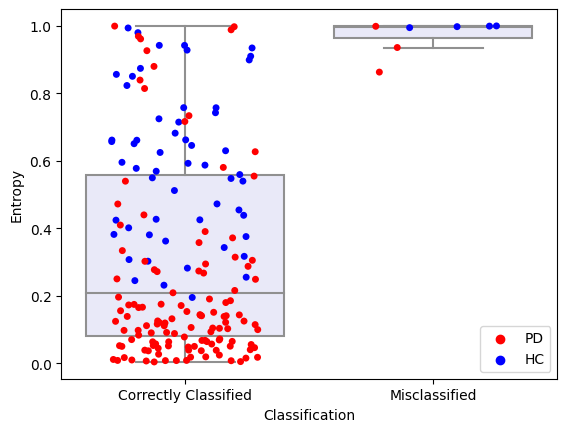

In [74]:
box_color_palette = ['#E6E6FA','#E6E6FA']# colors=[lavender, lavender]
strip_color_palette = {'HC': '#0000FF', 'PD': '#FF0000'}# colors=[bright red, bright blue]
jitter_amount = 0.3
fig, ax = plt.subplots()
ax = sns.boxplot(x='Classification', y='Entropy', data=df_deep, palette=box_color_palette, showfliers=False)
np.random.seed(42)
sns.stripplot(x='Classification', y='Entropy', data=df_deep, hue = 'Class', ax=ax, palette=strip_color_palette, jitter = jitter_amount)

plt.legend()

plt.show()

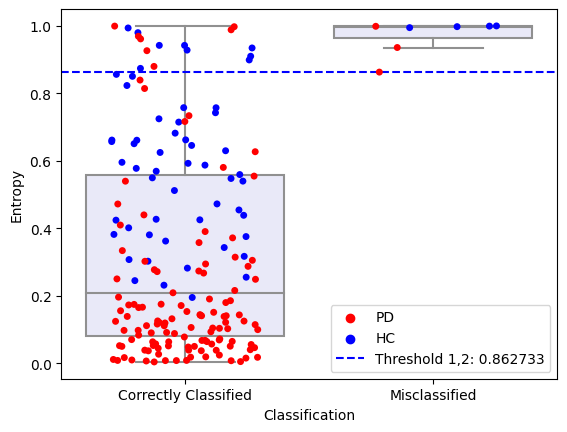

In [101]:
box_color_palette = ['#E6E6FA','#E6E6FA']# colors=[lavender, lavender]
strip_color_palette = {'HC': '#0000FF', 'PD': '#FF0000'}# colors=[bright red, bright blue]
jitter_amount = 0.3
fig, ax = plt.subplots()
ax = sns.boxplot(x='Classification', y='Entropy', data=df_deep, palette=box_color_palette, showfliers=False)
np.random.seed(42)
sns.stripplot(x='Classification', y='Entropy', data=df_deep, hue = 'Class', ax=ax, palette=strip_color_palette, jitter = jitter_amount)

# Add a horizontal red line at a specific entropy value
PD_entropy_threshold = 0.862733 # Change this to your desired entropy value
base_entropy_threshold = 0.862733
ax.axhline(y=PD_entropy_threshold, color='blue', linestyle='--', label=f'Threshold 1,2: {PD_entropy_threshold}')
#ax.axhline(y=PD_entropy_threshold, color='crimson', linestyle='--', label=f'Threshold 2: {PD_entropy_threshold}')
#ax.axhline(y=base_entropy_threshold, color='green', linestyle='--', label=f'Base Threshold: {base_entropy_threshold}')
#ax.text(0.5, PD_entropy_threshold, f'{PD_entropy_threshold:.6f}', color='red', ha='left', va='bottom')
#ax.text(0.5, base_entropy_threshold, f'{base_entropy_threshold:.6f}', color='green', ha='left', va='bottom')
plt.legend()

plt.show()

## 3rd DE MODEL

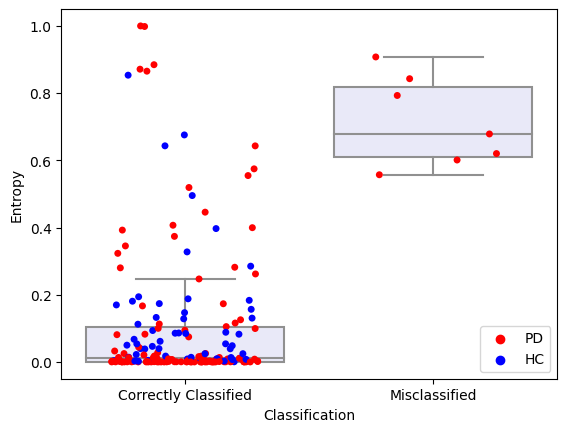

In [103]:
box_color_palette = ['#E6E6FA','#E6E6FA']# colors=[lavender, lavender]
strip_color_palette = {'HC': '#0000FF', 'PD': '#FF0000'}# colors=[bright red, bright blue]
jitter_amount = 0.3
fig, ax = plt.subplots()
ax = sns.boxplot(x='Classification', y='Entropy', data=df_3RD, palette=box_color_palette, showfliers=False)
np.random.seed(42)
sns.stripplot(x='Classification', y='Entropy', data=df_3RD, hue = 'Class', ax=ax, palette=strip_color_palette, jitter = jitter_amount)

plt.legend(loc='lower right')

plt.show()

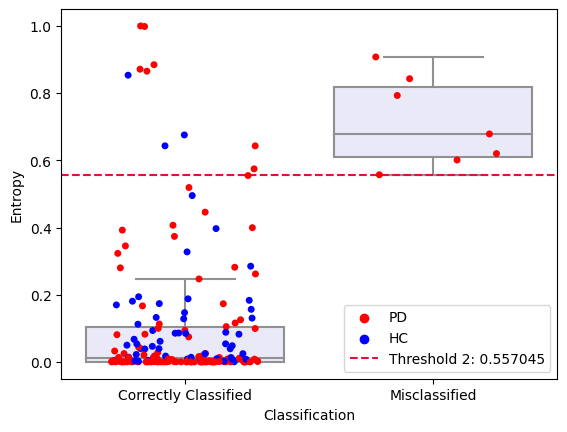

In [88]:
box_color_palette = ['#E6E6FA','#E6E6FA']# colors=[lavender, lavender]
strip_color_palette = {'HC': '#0000FF', 'PD': '#FF0000'}# colors=[bright red, bright blue]
jitter_amount = 0.3
fig, ax = plt.subplots()
ax = sns.boxplot(x='Classification', y='Entropy', data=df_3RD, palette=box_color_palette, showfliers=False)
np.random.seed(42)
sns.stripplot(x='Classification', y='Entropy', data=df_3RD, hue = 'Class', ax=ax, palette=strip_color_palette, jitter = jitter_amount)

# Add a horizontal red line at a specific entropy value
PD_entropy_threshold = 0.557045 # Change this to your desired entropy value
base_entropy_threshold = 0.557045
ax.axhline(y=PD_entropy_threshold, color='crimson', linestyle='--', label=f'Threshold 2: {PD_entropy_threshold}')
#ax.axhline(y=base_entropy_threshold, color='green', linestyle='--', label=f'Base Threshold: {base_entropy_threshold}')
#ax.text(0.5, PD_entropy_threshold, f'{PD_entropy_threshold:.6f}', color='red', ha='left', va='bottom')
#ax.text(0.5, base_entropy_threshold, f'{base_entropy_threshold:.6f}', color='green', ha='left', va='bottom')
plt.legend()

plt.show()

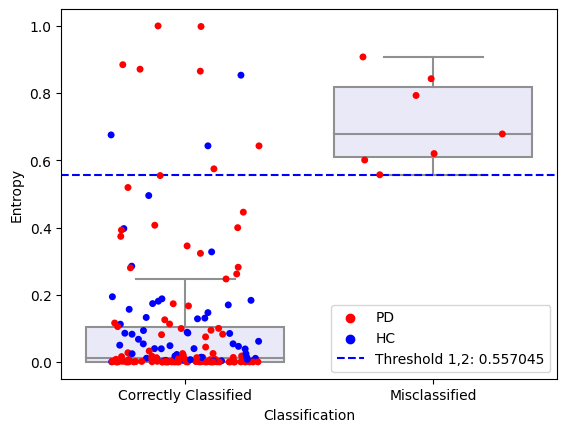

In [100]:
# Create the subplots
fig, ax = plt.subplots()

# Create the boxplot
ax = sns.boxplot(x='Classification', y='Entropy', data=df_3RD, palette=box_color_palette, showfliers=False)

# Overlay the stripplot with alternate green and crimson colors
sns.stripplot(x='Classification', y='Entropy', data=df_3RD, hue='Class', ax=ax, palette=strip_color_palette, jitter=jitter_amount)

# Add a horizontal dashed line at a specific entropy value
PD_entropy_threshold = 0.557045  # Change this to your desired entropy value
base_entropy_threshold = 0.557045
ax.axhline(y=PD_entropy_threshold, color='blue', linestyle='--', label=f'Threshold 1,2: {PD_entropy_threshold}')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
## Count and comparison of total samples to observe above threshold

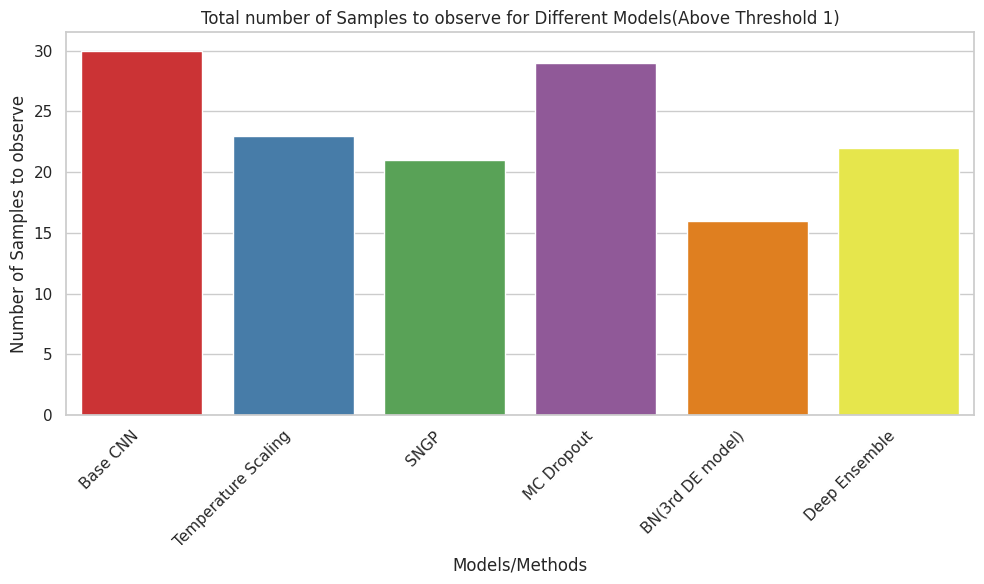

In [109]:
# Data
samples = [30, 23, 21, 29, 16, 22]
methods = ['Base CNN', 'Temperature Scaling', 'SNGP', 'MC Dropout', 'BN(3rd DE model)', 'Deep Ensemble']

# Create a colormap with a different color for each method
colors = sns.color_palette("Set1", n_colors=len(methods))

# Create a barplot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=methods, y=samples, palette=colors)

# Set labels and title
plt.xlabel("Models/Methods")
plt.ylabel("Number of Samples to observe")
plt.title("Total number of Samples to observe for Different Models(Above Threshold 1)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.show()

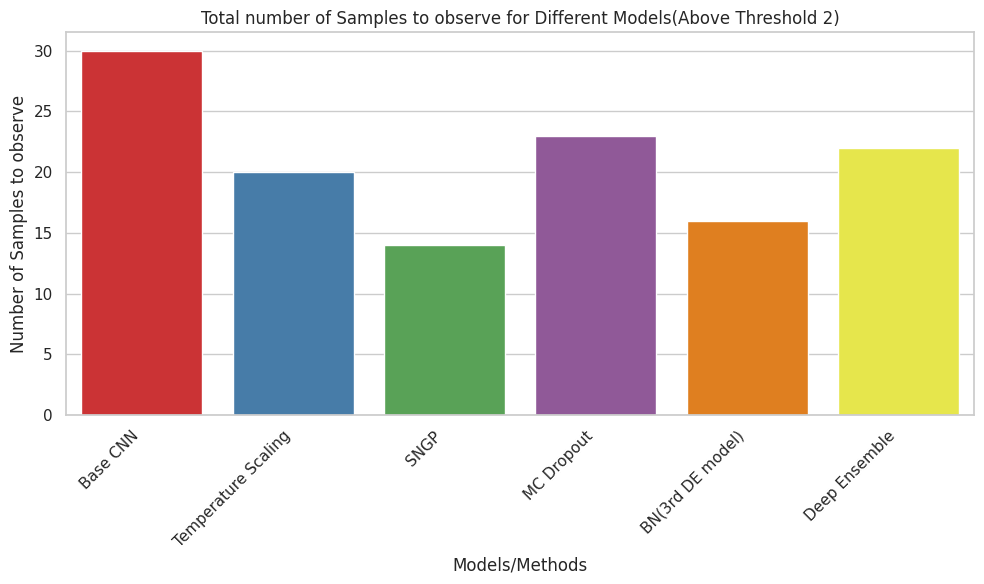

In [112]:
# Data
samples = [30, 20, 14, 23, 16, 22]
methods = ['Base CNN', 'Temperature Scaling', 'SNGP', 'MC Dropout', 'BN(3rd DE model)', 'Deep Ensemble']

# Create a colormap with a different color for each method
colors = sns.color_palette("Set1", n_colors=len(methods))


# Create a barplot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=methods, y=samples, palette=colors)

# Set labels and title
plt.xlabel("Models/Methods")
plt.ylabel("Number of Samples to observe")
plt.title("Total number of Samples to observe for Different Models(Above Threshold 2)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.show()